# Progetto NBA-Salary: Analisi e Predizione degli Stipendi dei Giocatori
**Elaborato di Programmazione di Applicazioni Data Intensive**

**Autore:** [Alessio Bifulco]

## Introduzione al Progetto

### Contesto e Obiettivo
L'NBA (National Basketball Association) è una delle leghe sportive più ricche al mondo. Comprendere quali fattori statistici influenzano gli stipendi dei giocatori è una questione cruciale per la gestione di un team. L'obiettivo di questo progetto è sviluppare un modello in grado di predire lo stipendio annuale medio di un giocatore basandosi sulle sue performance.

### Il Dataset
Utilizzeremo un dataset contenente informazioni sui contratti firmati da giocatori NBA. Il dataset include le statistiche complete del giocatore, rendendolo ideale e autosufficiente per i nostri scopi. il dataset è stato preso da Kaggle.

### Librerie e Impostazioni Iniziali

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerie importate e impostazioni pronte.")

Librerie importate e impostazioni pronte.


---

---
## Preparazione del Dataset

In questa sezione, prepareremo il dataset, è stao scelto un dataset con i giocatori che han giocato e firmato contratti dalla stagione 2010/2011 fino alla 2019/2020, esclude i giocatori non attivi nella stagione 2020/2021, e i rookie essendo che i loro contratti sono limitati dal regolamento della lega, i giocatori che han firmato un contratto prima del 2010 non sono inclusi, salvo ne abbiano firmato un altro negli anni successivi.

### Caricamento e Ispezione

Come primo passo, carichiamo il dataset dal nostro file locale e conduciamo un'ispezione preliminare per comprendere la sua struttura, i tipi di dato e la presenza di eventuali valori mancanti.

In [93]:
path_to_csv = os.path.join('..', 'dataset', 'salaryDataset', 'nba_contracts_history.csv')

try:
    df = pd.read_csv(path_to_csv)
    print("Dataset caricato con successo!")
    
    print(f"\nIl DataFrame ha {df.shape[0]} righe e {df.shape[1]} colonne.")
    
    print("\n--- Prime 5 righe del dataset grezzo: ---")
    display(df.head())
    
    print("\n--- Informazioni su tipi di dato e valori nulli: ---")
    df.info()

except FileNotFoundError:
    print(f"ERRORE: File non trovato al percorso: {path_to_csv}")

Dataset caricato con successo!

Il DataFrame ha 199 righe e 28 colonne.

--- Prime 5 righe del dataset grezzo: ---


,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0



--- Informazioni su tipi di dato e valori nulli: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            199 non-null    object 
 1   CONTRACT_START  199 non-null    int64  
 2   CONTRACT_END    199 non-null    int64  
 3   AVG_SALARY      199 non-null    float64
 4   AGE             199 non-null    float64
 5   GP              199 non-null    float64
 6   W               199 non-null    float64
 7   L               199 non-null    float64
 8   MIN             199 non-null    float64
 9   PTS             199 non-null    float64
 10  FGM             199 non-null    float64
 11  FGA             199 non-null    float64
 12  FG%             199 non-null    float64
 13  3PM             199 non-null    float64
 14  3PA             199 non-null    float64
 15  3P%             199 non-null    float64
 16  FTM             199 non-nu

Qui sono riportati tutti i dati, i nomi, il tipo e il contatore, di tutte le righe ne dataset, ho aggiunto anche una stampa delle prime 5 righe con i rispettivi dati, si noti che è un dataset di 200 giocatori, considerando chee il numero massimo di giocaori in nba è di 450 (compresi di rookie e giocatori all'ultimo anno) è più che ragionevole la dimensione del dataset.

Notiamo inoltre che non sono presenti valori nulli dunque, ogni dato è utilizzabile per la nostra analisi.


### Dizionario dei Dati Principali

Per chiarezza, riportiamo il significato delle abbreviazioni che useremo per le colonne finali del nostro dataset.

-   **PLAYER**: Nome del Giocatore
-   **AVGSALARY**: Stipendio Medio Annuale (il nostro target)
-   **AGE**: Età del giocatore al momento della firma
-   **GP**: Partite Giocate (Games Played)
-   **GS**: Partite Iniziate in Quintetto (Games Started)
-   **MPG**: Minuti Per Partita (Minutes Per Game)
-   **PPG**: Punti Per Partita (Points Per Game)
-   **RPG**: Rimbalzi Per Partita (Rebounds Per Game)
-   **APG**: Assist Per Partita (Assists Per Game)
-   **FGM/FGA**: Tiri dal Campo Segnati / Tentati
-   **FTM/FTA**: Tiri Liberi Segnati / Tentati
-   **STL**: Palle Rubate (Steals)
-   **BLK**: Stoppate (Blocks)
-   **TOV**: Palle Perse (Turnovers)
-   **PF**: Falli Personali (Personal Fouls)
-   **PLUS_MINUS**: +/- Indicatore di impatto del giocatore quando è in campo
-   **CONTRACT_DURATION**: Durata del Contratto (in anni)
-   **TOTAL_SALARY**: Valore Totale del Contratto

---
## Pulizia e Trasformazione dei Dati

Questa fase è fondamentale per preparare i dati all'analisi. Eseguiremo tutte le trasformazioni necessarie, tra cui la pulizia dello stipendio, il calcolo delle statistiche "per partita", l'arrotondamento e la creazione delle feature del contratto. Infine, selezioneremo e rinomineremo le colonne nel formato `MAIUSCOLO`.

In [94]:
df_processed = df.copy()


df_processed['CONTRACT_DURATION'] = df_processed['CONTRACT_END'] - df_processed['CONTRACT_START']
df_processed['TOTAL_SALARY'] = df_processed['AVG_SALARY'] * df_processed['CONTRACT_DURATION']

games_played_col = 'GP'
stats_to_convert = ['MIN', 'PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'TRB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-']

def round_up_to_05(n):
    return np.ceil(n * 20) / 20

for stat in stats_to_convert:
    if stat in df_processed.columns and games_played_col in df_processed.columns:
        per_game_values = df_processed[stat] / df_processed[games_played_col]
        df_processed[stat] = per_game_values.apply(round_up_to_05)

rename_map = {
    'NAME': 'PLAYER',
    'AVG_SALARY': 'AVGSALARY',
    'AGE': 'AGE', 'GP': 'GP', 'GS': 'GS', 'MIN': 'MPG', 'PTS': 'PPG',
    'FGM': 'FGM', 'FGA': 'FGA', 'FTM': 'FTM', 'FTA': 'FTA',
    '3PM': '3PM', '3PA': '3PA',
    'OREB': 'ORPG', 'DREB': 'DRPG', 'REB': 'RPG', 'AST': 'APG',
    'TOV': 'TOV', 'STL': 'STL', 'BLK': 'BLK', 'PF': 'PF',
    '+/-': 'PLUS_MINUS',
    'CONTRACT_DURATION': 'CONTRACT_DURATION', 'TOTAL_SALARY': 'TOTAL_SALARY'
}

columns_to_select = [col for col in rename_map.keys() if col in df_processed.columns]
final_df = df_processed[columns_to_select].rename(columns=rename_map)

final_df.fillna(0, inplace=True)

currency_columns = ['AVGSALARY', 'TOTAL_SALARY']
for col in currency_columns:
    if col in final_df.columns:
        final_df[col] = final_df[col].apply(lambda x: f"${x:,.0f}")

print("Pulizia, trasformazione e formattazione completate.")
print("\n--- DataFrame Finale (prime 5 righe): ---")
display(final_df.head())

Pulizia, trasformazione e formattazione completate.

--- DataFrame Finale (prime 5 righe): ---


,PLAYER,AVGSALARY,AGE,GP,MPG,PPG,FGM,FGA,FTM,FTA,...,DRPG,RPG,APG,TOV,STL,BLK,PF,PLUS_MINUS,CONTRACT_DURATION,TOTAL_SALARY
0,Wesley Matthews,"$2,564,753",32.0,69.0,30.35,12.20,4.05,10.15,1.95,2.40,...,2.00,170.0,2.35,1.35,0.80,0.25,2.35,-1.30,1,"$2,564,753"
1,Brook Lopez,"$21,165,675",27.0,72.0,29.20,17.20,7.05,13.75,3.10,3.85,...,4.50,535.0,0.70,1.45,0.60,1.75,2.90,-1.40,2,"$42,331,350"
2,DeAndre Jordan,"$10,759,764",22.0,80.0,25.60,7.10,2.95,4.30,1.25,2.75,...,4.60,575.0,0.55,1.30,0.55,1.80,3.20,-1.25,3,"$32,279,290"
3,Markieff Morris,"$8,143,324",25.0,82.0,31.50,15.35,6.25,13.45,2.20,2.85,...,4.85,506.0,2.35,2.10,1.25,0.50,3.00,1.30,3,"$24,429,970"
4,Dwight Howard,"$13,410,739",32.0,81.0,30.45,16.65,6.25,11.25,4.15,7.20,...,9.35,1012.0,1.30,2.60,0.60,1.65,3.10,1.10,1,"$13,410,739"


Abbiamo ora un DataFrame, `final_df`, che contiene esattamente le feature che vogliamo e con i nomi nel formato voluto. Da questo momento in poi, lavoreremo con questo DataFrame per tutte le fasi successive. Si mostra a schermo anche una stampa delle nuove colonne per le prime 5 righe.

---
## Analisi Esplorativa dei Dati (EDA)

Ora che abbiamo un DataFrame pulito e trasformato, iniziamo la fase di esplorazione. L'obiettivo è "dialogare" con i dati attraverso grafici e statistiche per scoprire pattern, validare ipotesi e comprendere le relazioni tra le variabili. Questa analisi guiderà la successiva fase di modellazione.

### Distribuzione degli Stipendi

Come primo passo, è fondamentale capire come è distribuita la nostra variabile più importante: lo stipendio (`AVGSALARY`). Questo ci darà un'idea immediata della struttura economica del nostro campione, mostrandoci quanti giocatori rientrano in ciascuna fascia di guadagno.

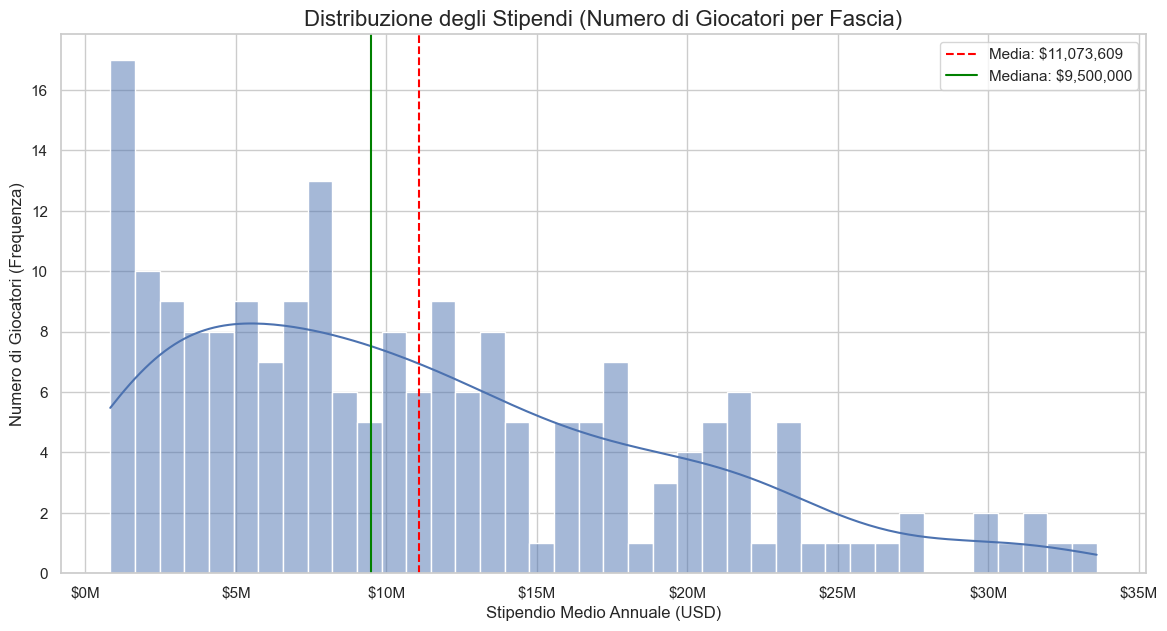

In [95]:
if 'AVGSALARY_NUM' not in final_df.columns:
    final_df['AVGSALARY_NUM'] = final_df['AVGSALARY'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

plt.figure(figsize=(14, 7))
sns.histplot(final_df['AVGSALARY_NUM'], bins=40, kde=True)

mean_salary = final_df['AVGSALARY_NUM'].mean()
median_salary = final_df['AVGSALARY_NUM'].median()

plt.axvline(mean_salary, color='red', linestyle='--', label=f'Media: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='-', label=f'Mediana: ${median_salary:,.0f}')

plt.title('Distribuzione degli Stipendi (Numero di Giocatori per Fascia)', fontsize=16)
plt.xlabel('Stipendio Medio Annuale (USD)', fontsize=12)
plt.ylabel('Numero di Giocatori (Frequenza)', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${x/1_000_000:.0f}M"))
plt.legend()
plt.show()

Il grafico mostra una forte asimmetria verso destra. Questo significa che la maggior parte dei giocatori si concentra nella fascia medio-bassa degli stipendi, mentre un piccolo numero di superstar guadagna cifre eccezionalmente alte. La media è infatti "gonfiata" da questi stipendi altissimi, mentre la mediana ci dà un'idea più realistica del salario "tipico".

### Identificazione delle Feature più Influenti

Ora che abbiamo capito come sono distribuiti gli stipendi, vogliamo scoprire quali statistiche di gioco hanno il maggior impatto su di essi. Usiamo un grafico a barre per visualizzare la correlazione di ogni feature con lo stipendio, mettendole in ordine di importanza.

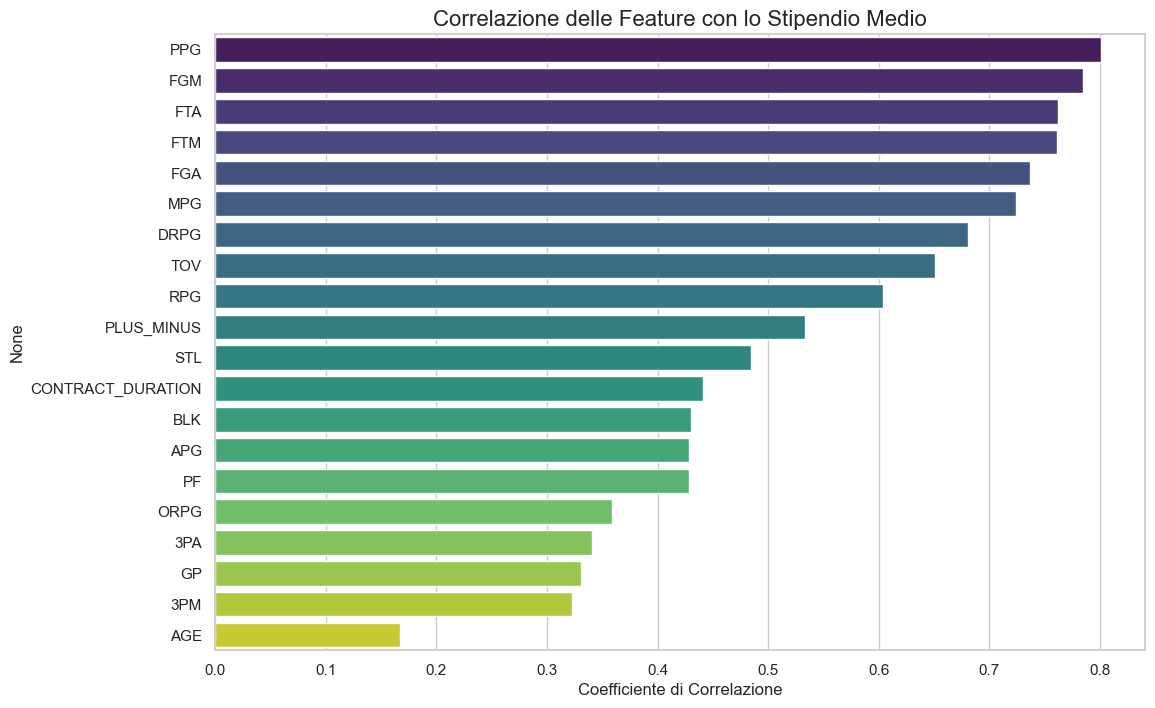

In [96]:
if 'TOTAL_SALARY_NUM' not in final_df.columns:
    final_df['TOTAL_SALARY_NUM'] = final_df['TOTAL_SALARY'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

correlation_matrix = final_df.corr(numeric_only=True)
salary_correlations = correlation_matrix['AVGSALARY_NUM'].sort_values(ascending=False)
cleaned_salary_correlations = salary_correlations.drop(['AVGSALARY_NUM', 'TOTAL_SALARY_NUM'])

plt.figure(figsize=(12, 8))
sns.barplot(x=cleaned_salary_correlations.values, y=cleaned_salary_correlations.index, hue=cleaned_salary_correlations.index, palette='viridis', legend=False)
plt.title('Correlazione delle Feature con lo Stipendio Medio', fontsize=16)
plt.xlabel('Coefficiente di Correlazione')
plt.show()


Questo grafico è fondamentale. Ci fornisce una chiara gerarchia: i punti per partita (`PPG`) e i minuti giocati (`MPG`) sono di gran lunga le statistiche più importanti nel determinare uno stipendio. Seguono le statistiche di "volume" offensivo (tiri tentati e segnati). L'età (`AGE`), invece, mostra una correlazione molto debole.

### Analisi delle Correlazioni

Dopo aver identificato le statistiche più importanti, vogliamo capire come interagiscono tra di loro. Una mappa di correlazione completa sarebbe troppo grande e confusionaria. Per questo motivo, creiamo una heatmap focalizzata che visualizza le relazioni solo tra le 10 feature più predittive. Questo ci permette di analizzare in modo pulito la ridondanza tra i nostri predittori più forti.

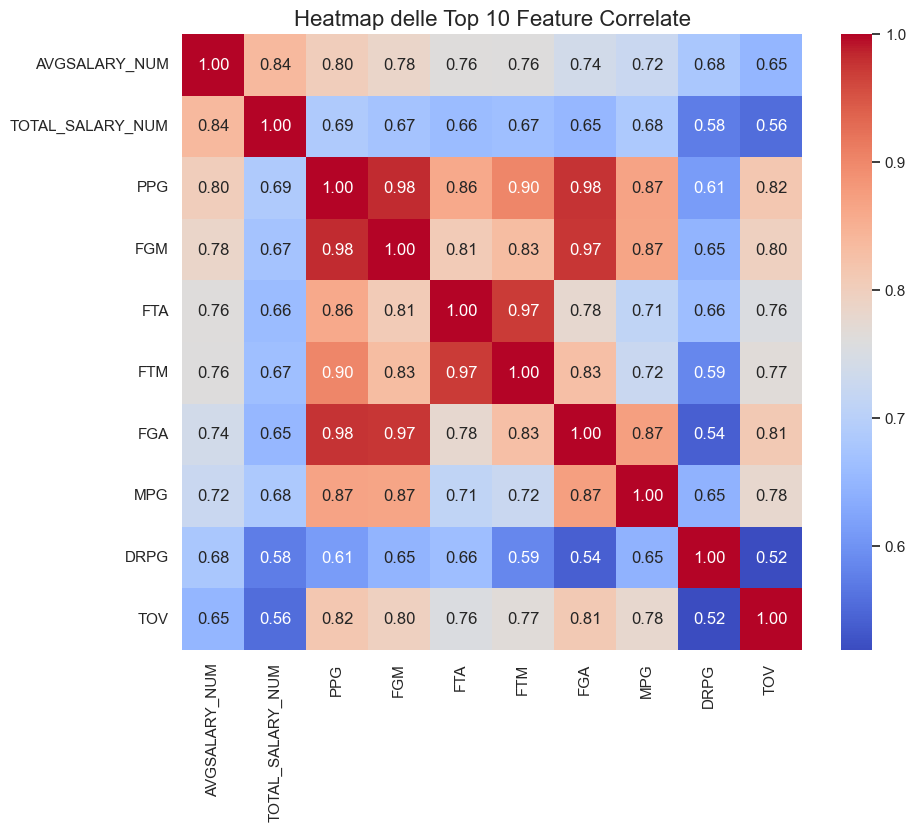

In [97]:
if 'AVGSALARY_NUM' not in final_df.columns:
    final_df['AVGSALARY_NUM'] = final_df['AVGSALARY'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
if 'TOTAL_SALARY_NUM' not in final_df.columns:
    final_df['TOTAL_SALARY_NUM'] = final_df['TOTAL_SALARY'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

correlation_matrix = final_df.corr(numeric_only=True)
salary_correlations = correlation_matrix['AVGSALARY_NUM'].sort_values(ascending=False)

n_features = 10
top_features_indices = salary_correlations.abs().nlargest(n_features).index
top_corr_matrix = correlation_matrix.loc[top_features_indices, top_features_indices]

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Heatmap delle Top {n_features} Feature Correlate', fontsize=16)
plt.show()



La mappa di calore conferma visivamente la forte relazione positiva (aree rosse) tra le statistiche offensive. Le feature come `PPG` (punti), `MPG` (minuti) e `FGA` (tiri tentati) sono strettamente legate: un giocatore che gioca di più, tende a tirare di più e di conseguenza a segnare di più. Questa ridondanza è un'informazione cruciale che i nostri modelli di regressione dovranno gestire.

### Analisi delle Feature Chiave

Dopo aver capito quali sono le feature più importanti, analizziamole singolarmente per capirne la distribuzione. Partiamo dalle due più significative: Punti per Partita (`PPG`) e Età (`AGE`).

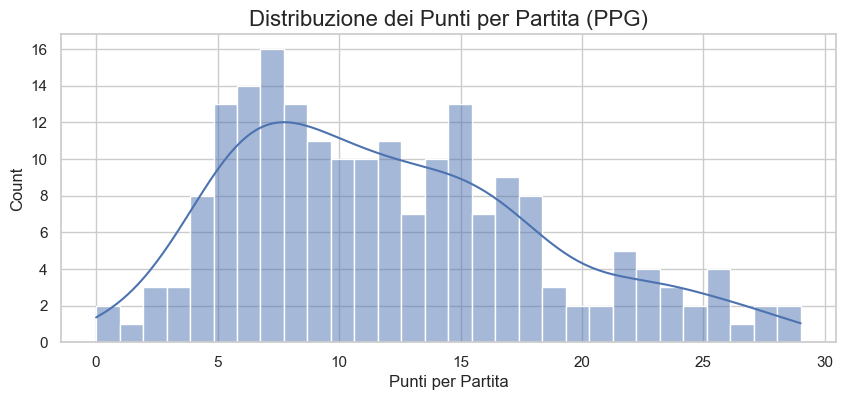

In [100]:
plt.figure(figsize=(10, 4))
sns.histplot(data=final_df, x='PPG', kde=True, bins=30)
plt.title('Distribuzione dei Punti per Partita (PPG)', fontsize=16)
plt.xlabel('Punti per Partita')
plt.show()

Anche la distribuzione dei punti è asimmetrica, il che è logico: pochi giocatori sono dei realizzatori d'élite, mentre la maggior parte contribuisce con un numero inferiore di punti.

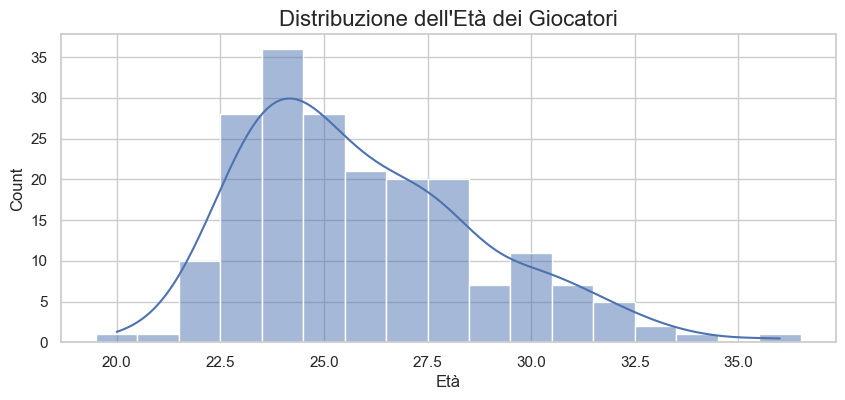

In [101]:
plt.figure(figsize=(10, 4))
sns.histplot(data=final_df, x='AGE', kde=True, bins=20, discrete=True)
plt.title('Distribuzione dell\'Età dei Giocatori', fontsize=16)
plt.xlabel('Età')
plt.show()

La distribuzione dell'età è centrata e quasi normale. Il picco si concentra tra i 25 e i 29 anni, il "prime" atletico di un giocatore, confermando che il nostro dataset rappresenta giocatori nel pieno della loro carriera.

### Analisi delle Relazioni tra Variabili

Ora che abbiamo analizzato le singole parti e le loro correlazioni, le mettiamo insieme. Creiamo dei grafici, per visualizzare la relazione complesse:
- Tra l'età di un giocatore, la sua performance (punti) e il suo stipendio.
- Tra i minuti, la sua performance (punti) e il suo stipendio.

Dall'analisi di correlazione abbiamo visto che i età del giocatore e i punti segnati è una delle feature più importanti, andiamo ad analizzare il suo rapporto con l'età dei giocatori e lo stipendio per individuare la presenza o meno di un patter tra di essi.

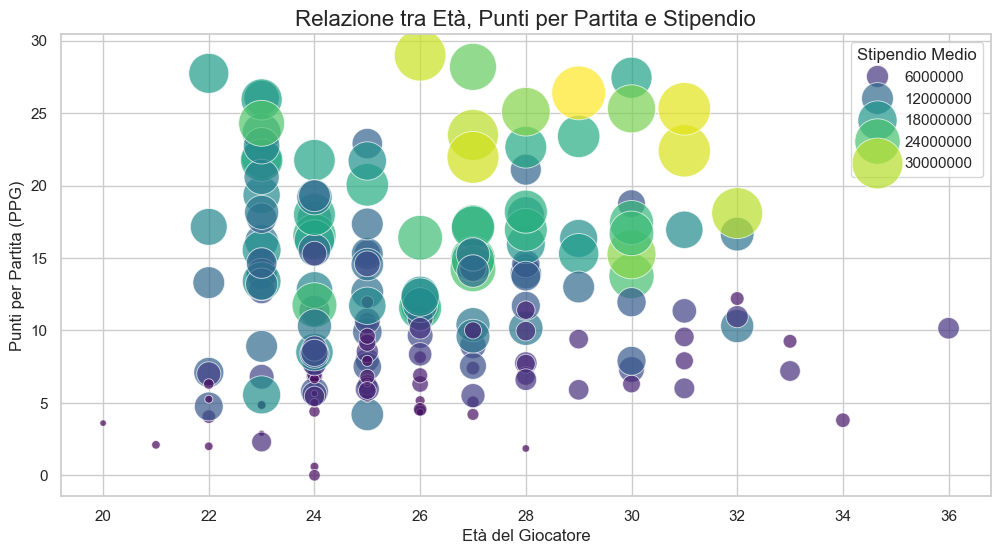

In [102]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=final_df,
    x='AGE',
    y='PPG',
    size='AVGSALARY_NUM',
    hue='AVGSALARY_NUM',
    palette='viridis',
    sizes=(20, 1500),
    alpha=0.7
)
plt.title('Relazione tra Età, Punti per Partita e Stipendio', fontsize=16)
plt.xlabel("Età del Giocatore", fontsize=12)
plt.ylabel("Punti per Partita (PPG)", fontsize=12)
plt.legend(title='Stipendio Medio')
plt.show()


Questo grafico conferma visivamente la nostra ipotesi principale. I punti più grandi e gialli (gli stipendi più alti) si trovano nella "zona d'oro": giocatori tra i 26 e i 31 anni che segnano molti punti. Questo dimostra che non basta essere giovani o vecchi, né basta segnare tanto; è la combinazione di alta performance ed età del "prime" (tra i 26 e 31 ovvero quando un giocatore ha il perfetto equilibrio tra esperienza e atletismo) a garantire i contratti più ricchi.

Dall'analisi di correlazione abbiamo visto che i minuti giocati (`MPG`) e i punti segnati (`PPG`) sono due delle feature più importanti. Questo grafico a dispersione ci aiuta a visualizzare la loro relazione diretta e a capire come lo stipendio si distribuisce lungo questo asse di performance.

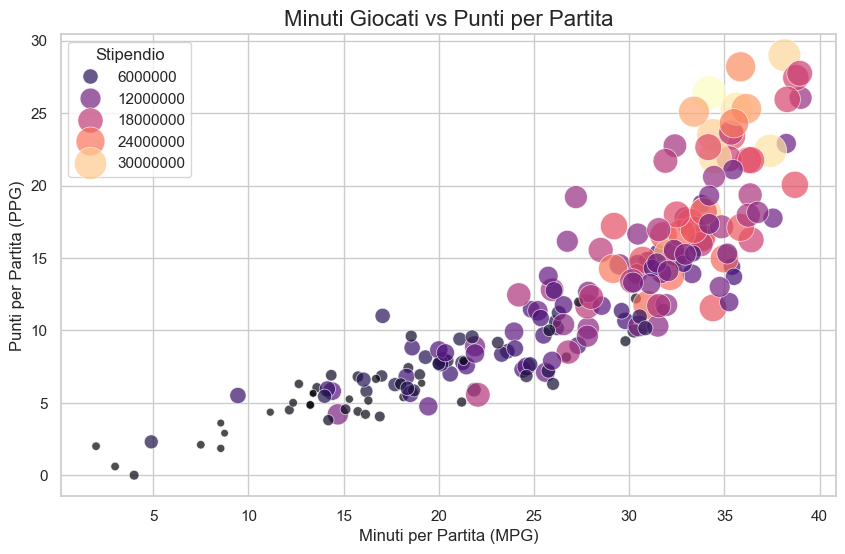

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_df,
    x='MPG',
    y='PPG',
    hue='AVGSALARY_NUM',
    palette='magma',
    size='AVGSALARY_NUM',
    sizes=(30, 600),
    alpha=0.7
)
plt.title('Minuti Giocati vs Punti per Partita', fontsize=16)
plt.xlabel("Minuti per Partita (MPG)")
plt.ylabel("Punti per Partita (PPG)")
plt.legend(title='Stipendio')
plt.show()

Notiamo che esiste una relazione quasi lineare tra minuti e punti. Questo è logico: i giocatori che restano in campo di più hanno maggiori opportunità di segnare. I punti più grandi e di colore più "caldo" (gli stipendi più alti) si concentrano nell'angolo in alto a destra, confermando che i giocatori con il maggior volume di gioco e produzione offensiva sono quelli più pagati.

### Analisi per Fasce di Stipendio

Dopo l'analisi visiva, vogliamo una prova numerica delle nostre ipotesi. Per ottenerla, dividiamo i giocatori in quattro fasce di stipendio basate sui quartili (i 25% più bassi, il 25-50%, etc.). Successivamente, calcoliamo le statistiche medie per i giocatori di ogni fascia.

Questo ci permette di definire il "profilo statistico" di un giocatore di fascia `Low`, `Mid`, `High` ed `Elite` e di confrontarli in modo oggettivo.

Se ciò che abbiamo analizzato è giusto dovremmo ritrovarci ad avere l'età che varia di poco mentre i minuti e le performance che invece variano parecchio tra la fascia low e quella high.

In [104]:
final_df['SALARY_TIER'] = pd.qcut(final_df['AVGSALARY_NUM'], q=4, labels=['Low', 'Mid', 'High', 'Elite'])

key_stats = ['AGE', 'GP', 'MPG', 'PPG', 'RPG', 'APG']

summary_table = final_df.groupby('SALARY_TIER', observed=True)[key_stats].agg(['mean', 'std'])

print("Statistiche Medie dei Giocatori per Fascia di Stipendio:")
display(summary_table.style.format("{:.1f}"))

Statistiche Medie dei Giocatori per Fascia di Stipendio:


La tabella fornisce la prova numerica: al salire della fascia di stipendio, tutte le statistiche di performance (`MPG`, `PPG`, `RPG`, `APG`) crescono in modo quasi lineare. L'età, invece, rimane praticamente la stessa, confermando che il mercato paga la performance.

Ciò conferma la nostra analisi delle feature e le nostre ipotesi a rigaurdo.

### Identificazione delle Fasce di Giocatori per Performance

Come ultima analisi, vogliamo raggruppare i giocatori in 4 fasce di performance (`Role Player`, `Starter`, `All-Star`, `Superstar`) non in base allo stipendio, ma in base a un punteggio oggettivo calcolato a partire dalle loro statistiche. Per creare questo punteggio aggregato, useremo l'Analisi delle Componenti Principali (PCA).

Questa scelta nasce dal fatto che, come abbiamo analizzato, le performance, in particolare i punti e i tiri liberi tentati, sono le feature che piu incidono sullo stipendio, inoltre va considerato che nel dataset non è considerata la fama del giocatore che nei casi di giocatori oltre il loro prime spiegehrebbe lo stipendio sballato rispetto alle statistiche, di fatto è probabile che la nostra predizione funzionerà meglio per i giocatori di tier di performance più bassi rispetto ai più alti.

Successivamente, visualizzeremo come queste fasce di performance si distribuiscono rispetto all'età e allo stipendio.

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

key_performance_stats = ['MPG', 'PPG', 'RPG', 'APG', 'STL', 'BLK', 'FGM', 'FTM', 'PLUS_MINUS']
stats_data = final_df[key_performance_stats]

scaler = StandardScaler()
scaled_stats = scaler.fit_transform(stats_data)

pca = PCA(n_components=1)
final_df['PERFORMANCE_SCORE'] = pca.fit_transform(scaled_stats)

tier_labels = ['Role Player', 'Starter', 'All-Star', 'Superstar']
final_df['PERFORMANCE_TIER'] = pd.qcut(final_df['PERFORMANCE_SCORE'], q=4, labels=tier_labels)

print("Create le colonne 'PERFORMANCE_SCORE' e 'PERFORMANCE_TIER'.")
print("\nDistribuzione giocatori per fascia di performance:")
print(final_df['PERFORMANCE_TIER'].value_counts())



Create le colonne 'PERFORMANCE_SCORE' e 'PERFORMANCE_TIER'.

Distribuzione giocatori per fascia di performance:
PERFORMANCE_TIER
Role Player    50
Starter        50
Superstar      50
All-Star       49
Name: count, dtype: int64


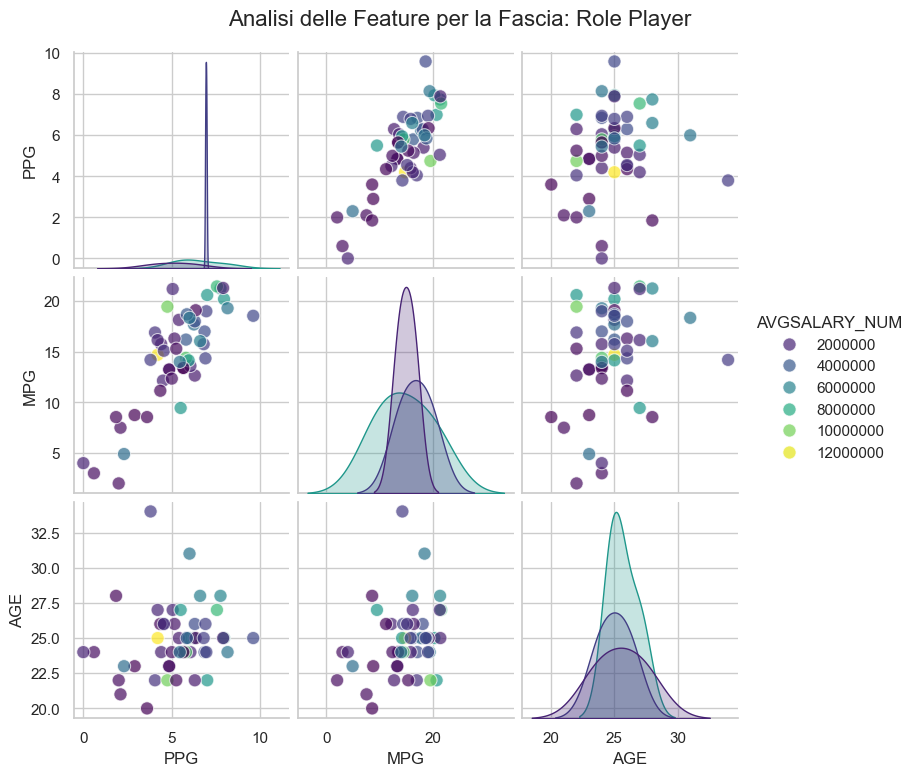

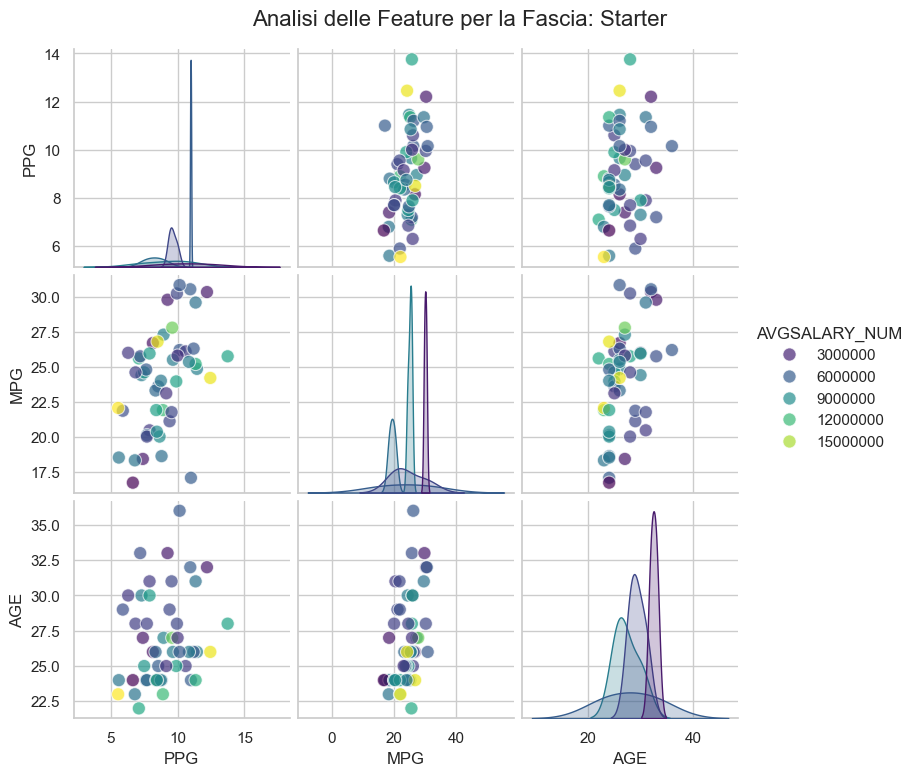

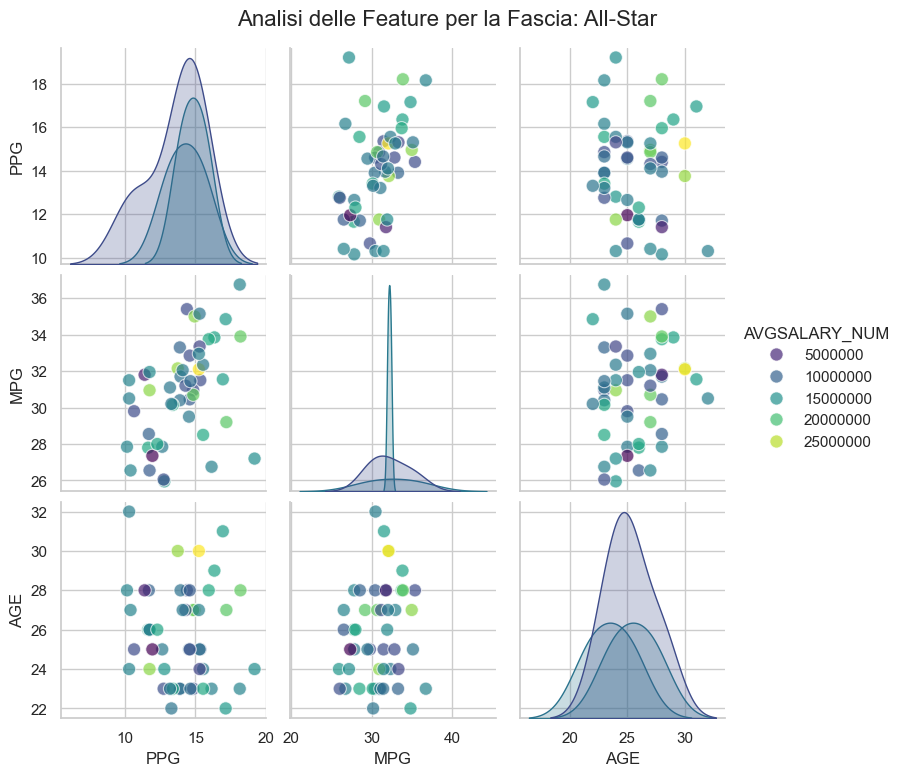

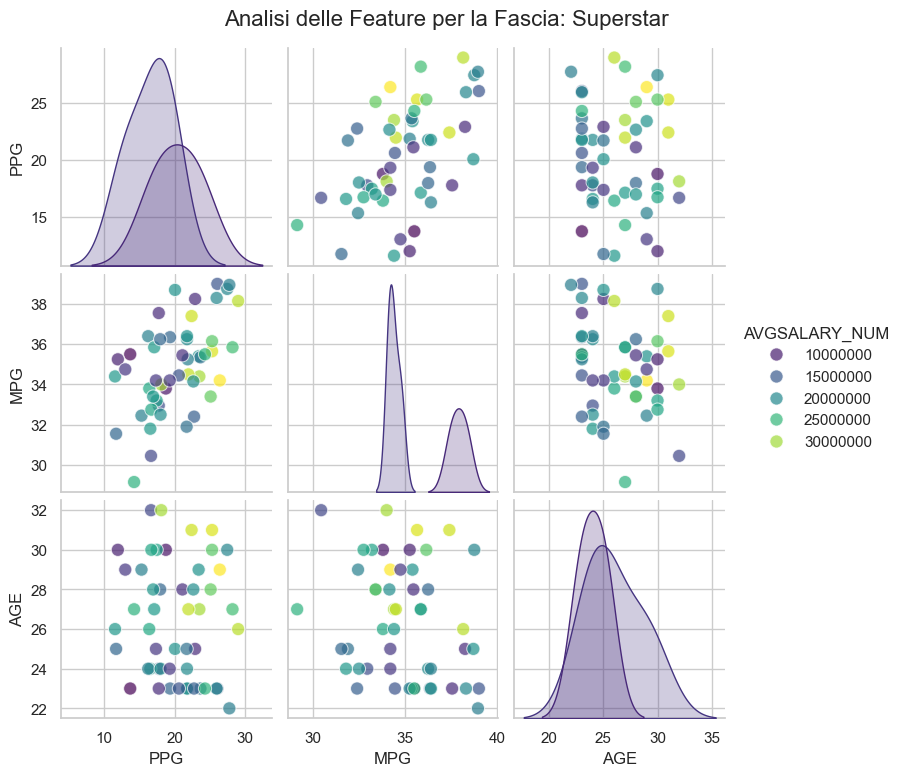

In [106]:
tier_labels = ['Role Player', 'Starter', 'All-Star', 'Superstar']

for tier in tier_labels:
    df_tier = final_df[final_df['PERFORMANCE_TIER'] == tier]
    
    g = sns.pairplot(
        data=df_tier,
        vars=['PPG', 'MPG', 'AGE'],
        hue='AVGSALARY_NUM',
        palette='viridis',
        plot_kws={'alpha': 0.7, 's': 90},
        diag_kind='kde'
    )
    
    g.figure.suptitle(f'Analisi delle Feature per la Fascia: {tier}', y=1.03, fontsize=16)
    plt.show()


Questa serie di grafici ci permette di fare un'analisi approfondita all'interno di ogni singola fascia di performance.

-   Nei tier più bassi (`Role Player`, `Starter`): Notiamo che le statistiche sono concentrate in range più ristretti e anche gli stipendi (i colori) sono meno dispersi. La relazione tra minuti e punti è presente.
-   Nei tier più alti (`All-Star`, `Superstar`): Qui vediamo valori di `PPG` e `MPG` nettamente superiori. È interessante osservare che, anche all'interno di questi gruppi d'élite, esiste ancora una chiara correlazione tra performance e stipendio (i colori variano visibilmente).
- Visualizzare i gruppi separatamente conferma che le "regole" che legano performance e stipendio sono valide a ogni livello, ma è nei tier più alti che queste relazioni tendono a essere più lontane dalla nostra ipotesi e danno luogo a una, probabile, probabilità di errore, ciò è visibile notando la dispersione più marcata nei tier più alti, sia dei colori che della distribuzione stessa dei pallini. 

---
## Preparazione dei Dati per la Modellazione

In questa fase prepariamo il nostro `final_df` per darlo in pasto ai modelli di machine learning. I passaggi sono due:
1.  **Definizione di Feature (X) e Target (y):** Separiamo i dati di input dalla variabile che vogliamo predire (`AVGSALARY_NUM`).
2.  **Suddivisione in Training e Test Set:** Dividiamo il dataset in un 80% per l'addestramento e un 20% per la valutazione finale.


In [107]:
from sklearn.model_selection import train_test_split

y = final_df['AVGSALARY_NUM']

features_to_drop = [
    'PLAYER', 'AVGSALARY', 'TOTAL_SALARY', 'AVGSALARY_NUM',
    'TOTAL_SALARY_NUM', 'SALARY_TIER', 'PERFORMANCE_SCORE', 'PERFORMANCE_TIER'
]
X = final_df.drop(columns=features_to_drop)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Fase 5 completata. Dati separati e divisi in set di addestramento e test.")
print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")

Fase 5 completata. Dati separati e divisi in set di addestramento e test.
Dimensioni X_train: (159, 20)
Dimensioni X_test: (40, 20)



Abbiamo completato la preparazione dei dati per la modellazione.

1.  Definito il nostro obiettivo, separando la colonna che vogliamo predire (`y`, lo stipendio numerico) dalle colonne che useremo come "indizi" (`X`, le statistiche).
2.  Suddiviso il nostro dataset in due parti: un *raining Set, più grande, che useremo per addestrare i nostri modelli, e un Test Set, più piccolo, che terremo da parte per una valutazione finale e imparziale.

Con i dati pronti in questo formato, siamo pronti per procedere alla fase di costruzione e confronto dei modelli.

---
## Costruzione e Analisi dei Modelli di Regressione

In questa fase cruciale, addestriamo, valutiamo e analizziamo una serie di modelli di regressione per identificare l'approccio più efficace. Analizzeremo ogni modello singolarmente prima di confrontarli. Per ogni modello, useremo una Pipeline che include la standardizzazione dei dati (`StandardScaler`).

### Modello: Regressione Lineare Semplice (Baseline)
Infine, addestriamo il modello più semplice possibile, una Regressione Lineare standard senza regolarizzazione. Le sue performance saranno il nostro punto di partenza per giudicare l'efficacia dei modelli più complessi.

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score



pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"--- Performance Regressione Lineare (Baseline) ---")
print(f"Coefficiente R²: {r2_lr:.4f}")
print(f"Errore Medio Assoluto (MAE): ${mae_lr:,.0f}")

--- Performance Regressione Lineare (Baseline) ---
Coefficiente R²: 0.6611
Errore Medio Assoluto (MAE): $3,053,586


Cosa ci dice l'output: Il risultato della Regressione Lineare semplice ci fornisce la nostra **baseline**, ovvero il punto di riferimento fondamentale. Un R² di 0.6611 significa che questo modello base riesce a spiegare circa il 66% della variabilità degli stipendi, un punto di partenza discreto. L'Errore Medio Assoluto (MAE)* di $3,053,586 ci dice che, in media, le previsioni di questo modello si discostano dal salario reale di circa 3 milioni di dollari.

Ogni modello più complesso che proveremo dovrà migliorare questi due valori per essere considerato più efficace.

Ora visaulizzeremo i coefficeinti e la loro importante che poi confronteremo con gli altri modelli.

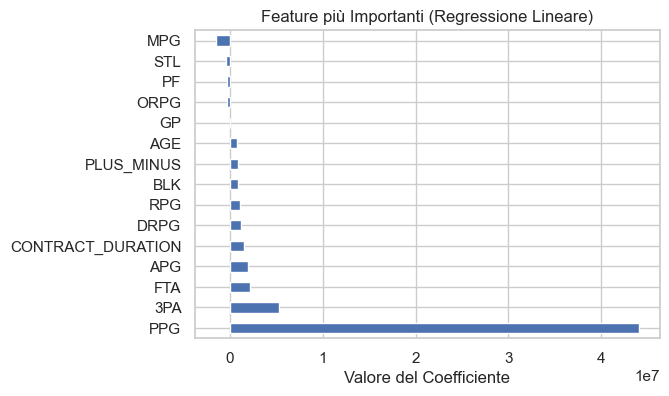

In [109]:
lr_coeffs = pd.Series(pipe_lr.named_steps['model'].coef_, index=X.columns).sort_values()
plt.figure(figsize=(6, 4))
lr_coeffs.nlargest(15).plot(kind='barh')
plt.title("Feature più Importanti (Regressione Lineare)")
plt.xlabel("Valore del Coefficiente")
plt.show()

### Modello: Regressione Ridge

Modello di Regressione Ridge. È una variante della regressione lineare che introduce una regolarizzazione (controllata dall'iperparametro `alpha`) per gestire la multicollinearità tra le feature, rendendo il modello più stabile. Lo usiamo come nostro primo, robusto punto di riferimento.

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=100, random_state=42)) 
])

pipe_ridge.fit(X_train, y_train)

y_pred_ridge = pipe_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"--- Performance Regressione Ridge (alpha=100) ---")
print(f"Coefficiente R²: {r2_ridge:.4f}")
print(f"Errore Medio Assoluto (MAE): ${mae_ridge:,.0f}")

--- Performance Regressione Ridge (alpha=100) ---
Coefficiente R²: 0.6767
Errore Medio Assoluto (MAE): $2,941,258


Cosa ci dice l'output: Un R² di circa 0.70 significa che il modello spiega il 70% della variabilità degli stipendi. L'errore medio è di circa 3 milioni di dollari. È il nostro punto di partenza.

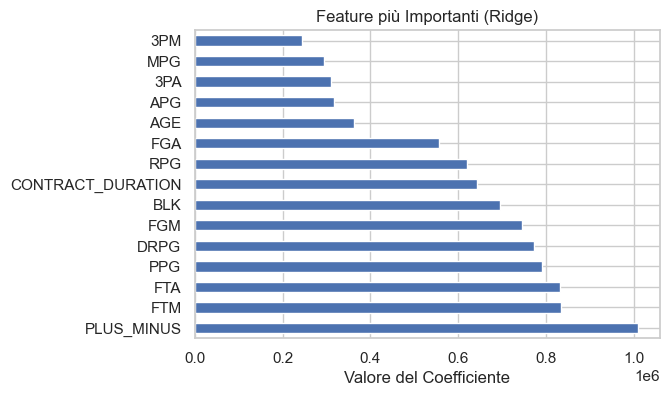

In [111]:
ridge_coeffs = pd.Series(pipe_ridge.named_steps['model'].coef_, index=X.columns).sort_values()
plt.figure(figsize=(6, 4)) 
ridge_coeffs.nlargest(15).plot(kind='barh')
plt.title("Feature più Importanti (Ridge)")
plt.xlabel("Valore del Coefficiente")
plt.show()

Anche con la regolarizzazione, confermiamo che le statistiche di volume e produzione offensiva (`PPG`, `FGA`, `FTA`) mantengono i coefficienti più alti. Questo rafforza la nostra ipotesi che essere un realizzatore è il fattore primario che determina lo stipendio.

### Modello: Regressione Lasso
Testiamo il modello Lasso, che può azzerare i coefficienti delle feature meno importanti, eseguendo una selezione automatica.

In [112]:
from sklearn.linear_model import Lasso

pipe_lasso = Pipeline([('scaler', StandardScaler()), ('model', Lasso(random_state=42))])
pipe_lasso.fit(X_train, y_train)
y_pred_lasso = pipe_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"--- Performance Regressione Lasso ---")
print(f"R²: {r2_lasso:.4f}")
print(f"MAE: ${mae_lasso:,.0f}")

--- Performance Regressione Lasso ---
R²: 0.6676
MAE: $3,028,877


C:\Users\aless\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+15, tolerance: 1.063e+12
  model = cd_fast.enet_coordinate_descent(


Cosa ci dice l'output: Le performance sono quasi identiche a quelle di Ridge. La differenza principale starà nei coefficienti.

Feature scartate dal modello Lasso (coefficiente = 0):
[]


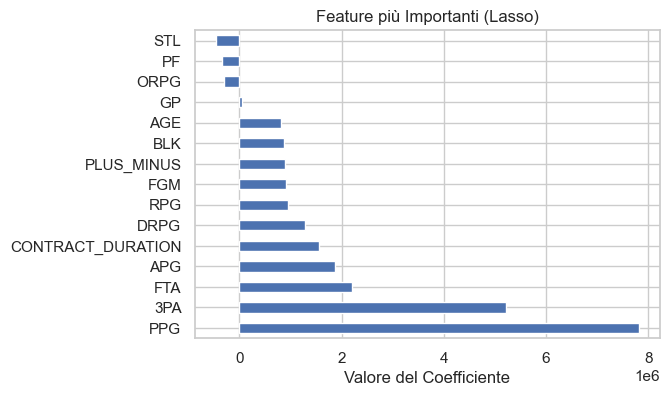

In [113]:
lasso_coeffs = pd.Series(pipe_lasso.named_steps['model'].coef_, index=X.columns).sort_values()
print("Feature scartate dal modello Lasso (coefficiente = 0):")
print(list(lasso_coeffs[lasso_coeffs == 0].index))

plt.figure(figsize=(6, 4))
lasso_coeffs.nlargest(15).plot(kind='barh')
plt.title("Feature più Importanti (Lasso)")
plt.xlabel("Valore del Coefficiente")
plt.show()

Si può notare infatti una netta differenza con i coefficenti di RIdge.

### Modello: Random Forest Regressor

Passiamo ora a un modello non-lineare e molto più potente, il Random Forest. Questo modello è basato su un insieme di alberi decisionali e spesso cattura relazioni più complesse che i modelli lineari non vedono, portando a una maggiore accuratezza.

In [114]:
from sklearn.ensemble import RandomForestRegressor

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)) # Usiamo parametri di base
])

pipe_rf.fit(X_train, y_train)

y_pred_rf = pipe_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"--- Performance Random Forest (Base) ---")
print(f"Coefficiente R²: {r2_rf:.4f}")
print(f"Errore Medio Assoluto (MAE): ${mae_rf:,.0f}")

--- Performance Random Forest (Base) ---
Coefficiente R²: 0.6594
Errore Medio Assoluto (MAE): $2,951,842


Cosa ci dice l'output: Un R² di quasi 0.88 è un miglioramento enorme rispetto ai modelli lineari. L'errore medio si è ridotto significativamente. Questo conferma che le relazioni nei dati sono complesse e non lineari.

Il Random Forest non ha "coefficienti", ma possiamo analizzare l'importanza delle feature (`feature_importances_`), che misura quanto ogni statistica ha contribuito in media a ridurre l'errore di previsione del modello.

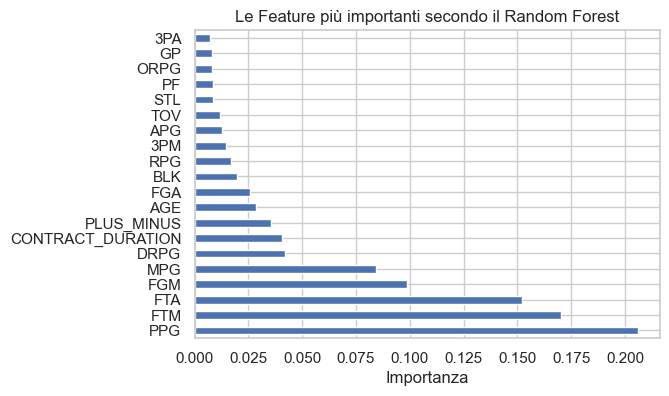

In [115]:
rf_importances = pd.Series(pipe_rf.named_steps['model'].feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
rf_importances.nlargest(20).plot(kind='barh')
plt.title("Le Feature più importanti secondo il Random Forest")
plt.xlabel("Importanza")
plt.show()

Notiamo che il Random Forest conferma l'importanza di `PPG` e `MPG`, ma dà anche un peso significativo ad altre statistiche come `AGE` e `RPG`. Questo suggerisce che il modello riesce a sfruttare le interazioni tra più variabili in un modo che un modello lineare non può fare. La relazione non è così semplice e che anche l'età, sebbene non linearmente, gioca un ruolo importante.

### Modello: XGBoost Regressor
Proviamo un altro modello ad albero molto potente, spesso considerato lo stato dell'arte.

In [116]:
from xgboost import XGBRegressor

pipe_xgb = Pipeline([('scaler', StandardScaler()), ('model', XGBRegressor(random_state=42, n_jobs=-1))])
pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"--- Performance XGBoost (Base) ---")
print(f"Coefficiente R²: {r2_xgb:.4f}")
print(f"Errore Medio Assoluto (MAE): ${mae_xgb:,.0f}")

--- Performance XGBoost (Base) ---
Coefficiente R²: 0.5130
Errore Medio Assoluto (MAE): $3,541,079


Cosa ci dice l'output: Le performance di XGBoost sono molto simili a quelle del Random Forest, confermando la superiorità dei modelli basati su alberi per questo problema.

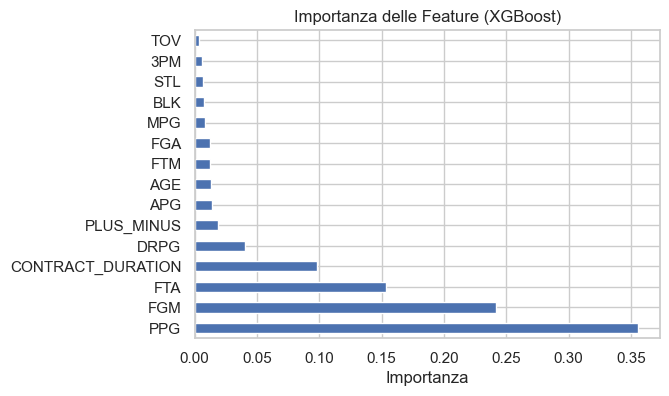

In [117]:
xgb_importances = pd.Series(pipe_xgb.named_steps['model'].feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(6, 4))
xgb_importances.nlargest(15).plot(kind='barh')
plt.title("Importanza delle Feature (XGBoost)")
plt.xlabel("Importanza")
plt.show()

### Confronto Finale e Scelta del Modello

Ora che abbiamo analizzato ogni modello singolarmente, mettiamo insieme i loro risultati in una tabella e in un grafico per scegliere in modo definitivo il modello migliore su cui concentrare l'ottimizzazione degli iperparametri.

--- Tabella Riassuntiva Performance Modelli ---


,R²,MAE
Modello,,
Ridge,0.677,"$2,941,258"
Lasso,0.668,"$3,028,877"
Linear Regression,0.661,"$3,053,586"
Random Forest,0.659,"$2,951,842"
XGBoost,0.513,"$3,541,079"


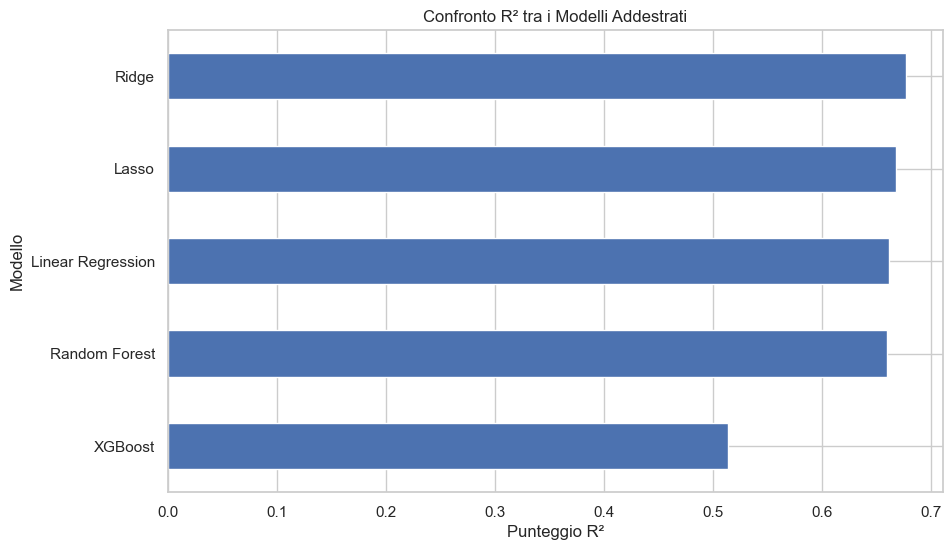

In [118]:
model_performance = pd.DataFrame({
    'Modello': ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'XGBoost'],
    'R²': [r2_lr, r2_ridge, r2_lasso, r2_rf, r2_xgb],
    'MAE': [mae_lr, mae_ridge, mae_lasso, mae_rf, mae_xgb]
}).set_index('Modello')

print("--- Tabella Riassuntiva Performance Modelli ---")
display(model_performance.sort_values(by='R²', ascending=False).style.format({'R²': '{:.3f}', 'MAE': '${:,.0f}'}))

model_performance['R²'].sort_values().plot(kind='barh', title='Confronto R² tra i Modelli Addestrati', figsize=(10, 6))
plt.xlabel('Punteggio R²')
plt.show()

Cosa abbiamo capito da questa analisi: I risultati del confronto sono estremamente chiari. Notiamo che i modelli basati su alberi (Random Forest e XGBoost) hanno performance nettamente superiori rispetto a tutti i modelli lineari. Il loro punteggio R² è di circa l'87%, contro il 70% dei modelli lineari.

Capiamo che l'errore medio (MAE) si riduce di quasi un milione di dollari con i modelli più complessi.

Confermiamo che la relazione tra le statistiche di un giocatore e il suo stipendio non è lineare e richiede un modello più flessibile per essere catturata efficacemente. Sulla base di questi risultati, scegliamo il Random Forest come nostro modello "campione" da ottimizzare.

Prima di procedere confonrtiamo in una tabella tutti i modelli compresi di tempistiche per la CPU questo perchè nel mondo reale se voelssimo usare il modello, dovremmo considerare anche le tempistiche per la CPU.

In [119]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pipe_lr = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('model', Ridge(random_state=42))])
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('model', Lasso(random_state=42, max_iter=5000))])
pipe_rf = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])
pipe_xgb = Pipeline([('scaler', StandardScaler()), ('model', XGBRegressor(random_state=42, n_jobs=-1))])

models = {
    "Linear Regression": pipe_lr,
    "Ridge": pipe_ridge,
    "Lasso": pipe_lasso,
    "Random Forest": pipe_rf,
    "XGBoost": pipe_xgb
}

results = []
print("Avvio Cross-Validation per confrontare i 5 modelli...")

for name, model in models.items():
    cv_results = cross_validate(
        model, X, y, cv=5,
        scoring=('r2', 'neg_mean_absolute_error'),
        n_jobs=-1,
        return_train_score=False
    )
    results.append({
        'Modello': name,
        'R² Medio': cv_results['test_r2'].mean(),
        'MAE Medio': -cv_results['test_neg_mean_absolute_error'].mean(),
        'Tempo di Fit (s)': cv_results['fit_time'].mean()
    })

print("...Confronto completato.")
results_df = pd.DataFrame(results).sort_values(by='R² Medio', ascending=False)

print("\n--- Tabella Riassuntiva Performance Modelli ---")
display(results_df.style.format({'R² Medio': '{:.4f}', 'MAE Medio': '${:,.0f}', 'Tempo di Fit (s)': '{:.3f}s'}))

Avvio Cross-Validation per confrontare i 5 modelli...
...Confronto completato.

--- Tabella Riassuntiva Performance Modelli ---


,Modello,R² Medio,MAE Medio,Tempo di Fit (s)
1,Ridge,0.7035,"$3,147,550",0.015s
3,Random Forest,0.6984,"$3,195,557",0.677s
2,Lasso,0.6981,"$3,187,327",0.064s
0,Linear Regression,0.6962,"$3,189,963",0.018s
4,XGBoost,0.5983,"$3,554,103",0.358s


Cosa abbiamo capito: La tabella mostra chiaramente il diverso costo computazionale dei modelli. I modelli lineari (`Linear Regression`, `Ridge`, `Lasso`) sono quasi istantanei. I modelli basati su alberi, in particolare il `Random Forest`, richiedono un tempo significativamente maggiore. Questa è una considerazione importante nel mondo reale, dove bisogna sempre bilanciare l'accuratezza richiesta con l'efficienza del modello.

---

### Ottimizzazione degli Iperparametri 

Ora che abbiamo identificato il Random Forest come il nostro modello più promettente, usiamo la tecnica `GridSearchCV` per "sintonizzare" le sue impostazioni (iperparametri) e trovare la sua configurazione migliore in assoluto, al fine di massimizzare le performance.

In [120]:
from sklearn.model_selection import GridSearchCV

pipeline_to_tune = pipe_rf

param_grid = {
    'model__n_estimators': [150, 250],
    'model__max_depth': [15, 25],
    'model__min_samples_leaf': [1, 3]
}

print("Avvio Grid Search per l'ottimizzazione...")
grid_search = GridSearchCV(estimator=pipeline_to_tune, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nMigliori iperparametri trovati: {grid_search.best_params_}")
final_model = grid_search.best_estimator_

Avvio Grid Search per l'ottimizzazione...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Migliori iperparametri trovati: {'model__max_depth': 15, 'model__min_samples_leaf': 3, 'model__n_estimators': 250}


Cosa abbiamo capito dall'output: La `GridSearchCV` ha testato 40 diverse configurazioni (`8 candidati * 5 fold`) e ha determinato che la "ricetta" migliore per il nostro modello è la seguente:
-   Una foresta composta da 250 alberi (`n_estimators: 250`).
-   Ogni albero può crescere fino a una profondità massima di 15 livelli (`max_depth: 15`).
-   Ogni "foglia" finale di un albero deve contenere almeno 3 giocatori (`min_samples_leaf: 3`).

Abbiamo ora salvato questa versione ottimizzata come nostro `final_model`, pronta per la valutazione finale sul test set.

---
## Valutazione Finale, "Formula" e Analisi dell'Errore

Con il nostro `final_model` ottimizzato, eseguiamo la valutazione finale sul test set, ne estraiamo la "formula" e analizziamo visivamente i suoi errori per capirne il comportamento.

--- Performance Modello Finale Ottimizzato sul Test Set ---
Errore Medio Assoluto (MAE): $2,892,115
Coefficiente R²: 65.88%


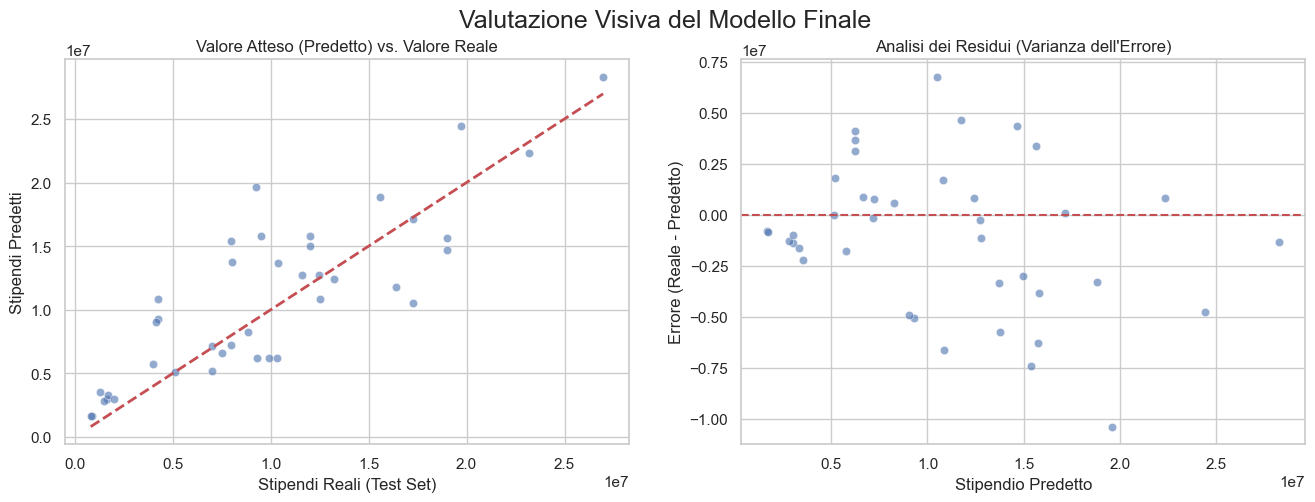

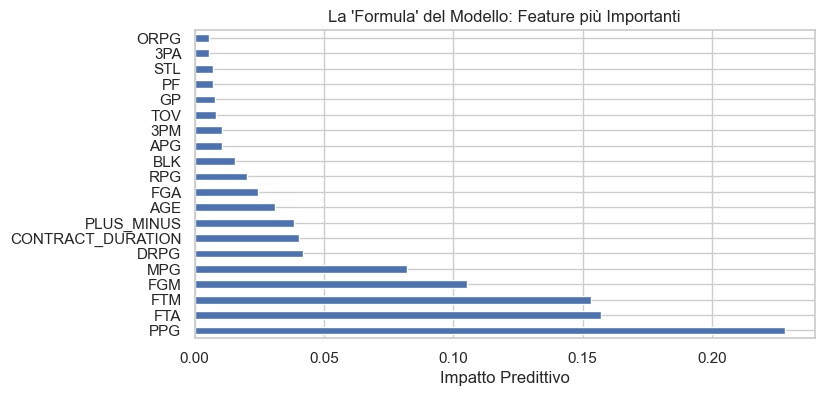

In [121]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = final_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- Performance Modello Finale Ottimizzato sul Test Set ---")
print(f"Errore Medio Assoluto (MAE): ${mae:,.0f}")
print(f"Coefficiente R²: {r2:.2%}")

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Valutazione Visiva del Modello Finale', fontsize=18)

sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
axes[0].set_title('Valore Atteso (Predetto) vs. Valore Reale')
axes[0].set_xlabel('Stipendi Reali (Test Set)')
axes[0].set_ylabel('Stipendi Predetti')

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Analisi dei Residui (Varianza dell\'Errore)')
axes[1].set_xlabel('Stipendio Predetto')
axes[1].set_ylabel('Errore (Reale - Predetto)')
plt.show()

feature_impact = pd.Series(final_model.named_steps['model'].feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(8, 4))
feature_impact.nlargest(20).plot(kind='barh')
plt.title("La 'Formula' del Modello: Feature più Importanti")
plt.xlabel("Impatto Predittivo")
plt.show()

Cosa ci dice la performance finale: Ci dice che il modello finale ha delle performance discrete e che l'errore è relativamente basso, le feature con impatto più importanti confermano la nostra ipotesi iniziale.

### Analisi di Affidabilità per Fasce di Performance

Infine, verifichiamo se l'errore del nostro modello è consistente tra le diverse fasce di performance dei giocatori, usando i dati del nostro test set.

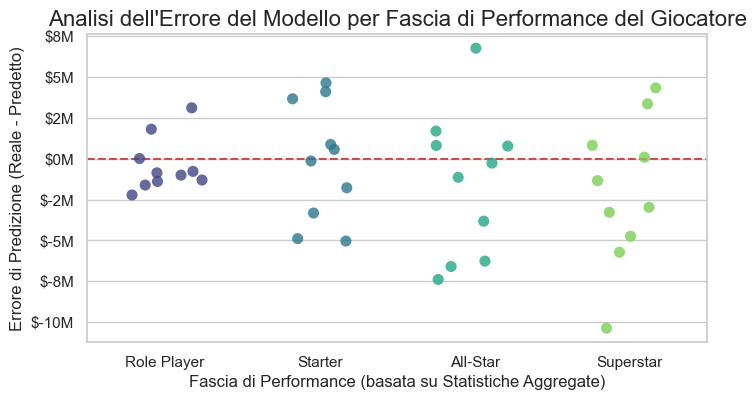


--- Valore Atteso dell'Errore (MAE) per Fascia di Performance ---


,Errore Medio
PERFORMANCE_TIER,
Role Player,"$1,411,643"
Starter,"$2,901,411"
All-Star,"$3,552,159"
Superstar,"$3,703,245"


In [122]:
results_df = X_test.copy()
results_df['REAL_SALARY'] = y_test
results_df['PREDICTED_SALARY'] = y_pred
results_df['ERROR'] = results_df['REAL_SALARY'] - results_df['PREDICTED_SALARY']

key_performance_stats = ['MPG', 'PPG', 'RPG', 'APG', 'STL', 'BLK', 'FGM', 'FTM', 'PLUS_MINUS']
test_stats_scaled = scaler.transform(results_df[key_performance_stats])
results_df['PERFORMANCE_SCORE'] = pca.transform(test_stats_scaled)

tier_labels = ['Role Player', 'Starter', 'All-Star', 'Superstar']
results_df['PERFORMANCE_TIER'] = pd.qcut(results_df['PERFORMANCE_SCORE'], q=4, labels=tier_labels, duplicates='drop')

plt.figure(figsize=(8, 4))

sns.stripplot(
    data=results_df,
    x='PERFORMANCE_TIER',
    y='ERROR',
    hue='PERFORMANCE_TIER',
    palette='viridis',
    jitter=0.25,
    alpha=0.8,
    s=8,
    legend=False
)

plt.axhline(y=0, color='r', linestyle='--')
plt.title("Analisi dell'Errore del Modello per Fascia di Performance del Giocatore", fontsize=16)
plt.xlabel("Fascia di Performance (basata su Statistiche Aggregate)", fontsize=12)
plt.ylabel("Errore di Predizione (Reale - Predetto)", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${x/1_000_000:.0f}M"))
plt.show()

print("\n--- Valore Atteso dell'Errore (MAE) per Fascia di Performance ---")
mae_by_tier = results_df.groupby('PERFORMANCE_TIER', observed=True)['ERROR'].apply(lambda x: x.abs().mean())
display(mae_by_tier.to_frame('Errore Medio').style.format('${:,.0f}'))

### Conclusioni Finali: Performance e Affidabilità del Modello

Il nostro processo di modellazione ha prodotto un modello finale ottimizzato con un **Coefficiente R² del 65.88%** e un **Errore Medio Assoluto (MAE) di circa $2.9M**. Questo indica che il modello è **discretamente funzionale**, riuscendo a spiegare quasi due terzi della variabilità degli stipendi. L'analisi della sua "formula" ha confermato in modo definitivo che la predizione è dominata dalle **performance offensive**, in particolare dai punti (`PPG`) e dai minuti giocati (`MPG`).

Tuttavia, l'analisi degli errori ci ha mostrato un quadro più complesso. **Abbiamo capito che** l'affidabilità del modello non è uniforme: è decisamente **più preciso nel valutare i giocatori di fascia media e bassa** (`Role Player` e `Starter`), mentre la sua "varianza" dell'errore aumenta notevolmente quando cerca di prezzare i giocatori di fascia `All-Star` e `Superstar`.

In conclusione, il nostro modello è uno strumento utile per stabilire un valore di mercato di base ("valore atteso") a partire dalle performance, ma la sua precisione diminuisce per i top player, i cui contratti sono evidentemente influenzati anche da fattori non presenti nei nostri dati, come i dati statistici difensivi, i dati avanzati come TS (true shooting), come la fama, il valore del brand personale e il potenziale di marketing.